# 1. Defining the problem

This dataset contains the data of few people medical history, with their medical conditions.
Based on all this conditions we have to determing whether the person is suffering from daibetes or not.

 * HighBP: 0 if not high BP and 1 if high BP
 * HighChol: 0 if not high cholesterol  and 1 if high cholesterol 
 * CholCheck: 0 if no cholestrol check in 5 years and 1 if cholestrol check in 5 years.              
 * BMI: Body mass index              
 * Smoker: 0 if person have not smoked at least 100 cigarettes in entire life and 1 if person have not smoked at least 100         cigarettes in entire life.      
 * Stroke: 0 if no and 1 if yes      
 * HeartDiseaseorAttack: 0 if no and 1 if yes
 * PhysActivity: physical activity in past 30 days, 0 if no and 1 if yes 
 * Fruits: Consume fruit 1 or more times per day, 0 if no and 1 if yes  
 * Veggies: Consume Vegitable 1 or more times per day, 0 if no and 1 if yes 
 * HvyAlcoholConsump: Heavy drinker(adult men having more than 14 drinks per week and adult women having more than 7 drink         per week), 0 if no and 1 if yes
 * AnyHealthcare: Have any kind of health care coverage, including insurance, prepaid plans such as HMO, etc. 0 if no and 1       if yes        
 * NoDocbcCost: Was there a case in past 12 months when you needed to see a doctur but could not because of cost? 0 if no         and 1 if yes           
 * GenHlth: Health score: 1=excellent, 2=very good, 3=good, 4=fair, 5=poor        
 * MentHlth:Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how         many days during the past 30 days was your mental health not good? Scale 1-30 days
 * PhysHlth: Now thinking about your physical health, which includes physical illness and injury for how many days during         the past 30 days was your physical health not good? Scale 1-30 days             
 * DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 if no and 1 if yes 
 * Sex: 0 if female and 1 if male                   
 * Age: 13-level age categories(_AGEG5YR) {1=(18-24),2=(25-29),3=(30-34),4=(35-39),5=(40-44),6=(45-49),7=(50-54),8=(55-           59),9=(60-64),10=(65=69),11=(70-74),12=(75-79),13=(>=80)}         
 * Education: Education level(EDUCA) {1=Never attended the school or only kindergarten, 2=Grade 1 to 8, 3= Grade 9 to 11, 4=       Grade 12 to high school graduate, 5= College 1 year to 3 year, 6= college 4 year or more.
 * Income: Income scale(INCOME2 codebook)    

# 2. Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# 3. Performing Exploratory Aata Analysis 

In [100]:
os.chdir("E:\diabetes")

In [101]:
diabetes=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [102]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [103]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [104]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [105]:
diabetes.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [106]:
diabetes.shape

(253680, 22)

In [107]:
duplicates = diabetes[diabetes.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  23899


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [108]:
diabetes.drop_duplicates(inplace=True)

In [109]:
diabetes.shape

(229781, 22)

In [110]:
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<AxesSubplot:xlabel='BMI'>

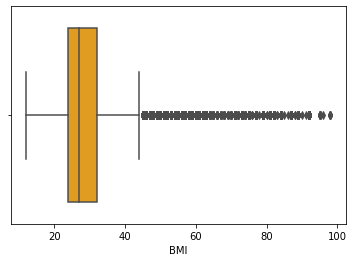

In [111]:
sns.boxplot(x='BMI', data=diabetes,color="orange")

In [112]:
''' Detection '''
# IQR
Q1 = np.percentile(diabetes['BMI'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(diabetes['BMI'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR


8.0

In [113]:
upper =(Q3+1.5*IQR)
lower =(Q1-1.5*IQR)
upper,lower

(44.0, 12.0)

In [114]:
diabetes_new = diabetes[(diabetes['BMI'] < 44) & (diabetes['BMI'] > 12)]
diabetes_new.shape,diabetes.shape

((223094, 22), (229781, 22))

In [115]:
diabetes_new.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [116]:
diabetes_new.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,...,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000,223094.000000
mean,0.313464,0.448537,0.440469,0.959053,28.003205,0.466619,0.044555,0.102647,0.739146,0.615315,...,0.946556,0.090926,2.579845,3.416672,4.538455,0.176755,0.442724,8.113903,4.986230,5.915179
std,0.713337,0.497346,0.496445,0.198168,5.311210,0.498886,0.206326,0.303498,0.439102,0.486522,...,0.224917,0.287504,1.058417,7.609366,8.918933,0.381462,0.496710,3.101829,0.991778,2.081233
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 4. Assigning Lables to Age, Weight, Height, and Premium price

In [117]:
under_index = diabetes_new[diabetes_new.BMI<18.5].index
normal_index = diabetes_new[(diabetes_new.BMI>=18.5) & (diabetes_new.BMI<24.9999)].index
over_index = diabetes_new[(diabetes_new.BMI>=25) & (diabetes_new.BMI<29.9999)].index
obesity_index = diabetes_new[(diabetes_new.BMI>=30) & (diabetes_new.BMI<39.9999)].index
Extreme_obesity_index = diabetes_new[diabetes_new.BMI>=40].index

diabetes_new.loc[under_index,'BMI_Status'] = '0'
diabetes_new.loc[normal_index,'BMI_Status'] = '1'
diabetes_new.loc[over_index,'BMI_Status'] = '2'
diabetes_new.loc[obesity_index,'BMI_Status'] = '3'
diabetes_new.loc[Extreme_obesity_index,'BMI_Status'] = '4'

In [118]:
under_index = diabetes_new[diabetes_new.MentHlth<10].index
normal_index = diabetes_new[(diabetes_new.MentHlth>=10) & (diabetes_new.MentHlth<20)].index
over_index = diabetes_new[(diabetes_new.MentHlth>=20) & (diabetes_new.MentHlth<=30)].index

diabetes_new.loc[under_index,'MentHlth_Status'] = '0'
diabetes_new.loc[normal_index,'MentHlth_Status'] = '1'
diabetes_new.loc[over_index,'MentHlth_Status'] = '2'

In [119]:
under_index = diabetes_new[diabetes_new.PhysHlth<10].index
normal_index = diabetes_new[(diabetes_new.PhysHlth>=10) & (diabetes_new.PhysHlth<20)].index
over_index = diabetes_new[(diabetes_new.PhysHlth>=20) & (diabetes_new.PhysHlth<=30)].index

diabetes_new.loc[under_index,'PhysHlth_Status'] = '0'
diabetes_new.loc[normal_index,'PhysHlth_Status'] = '1'
diabetes_new.loc[over_index,'PhysHlth_Status'] = '2'


In [120]:
diabetes_new.shape

(223094, 25)

In [121]:
diabetes_new.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Status', 'MentHlth_Status', 'PhysHlth_Status'],
      dtype='object')

In [122]:
Diabetes=diabetes_new.drop(['BMI','PhysHlth','MentHlth'],axis=1)
Diabetes.shape

(223094, 22)

In [123]:
Diabetes_clean=Diabetes.dropna()
Diabetes.shape

(223094, 22)

In [124]:
Diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMI_Status,MentHlth_Status,PhysHlth_Status
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4,1,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,7.0,6.0,1.0,2,0,0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,1.0,0.0,9.0,4.0,8.0,2,2,2
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,11.0,3.0,6.0,2,0,0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1,0,0


# 5. Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

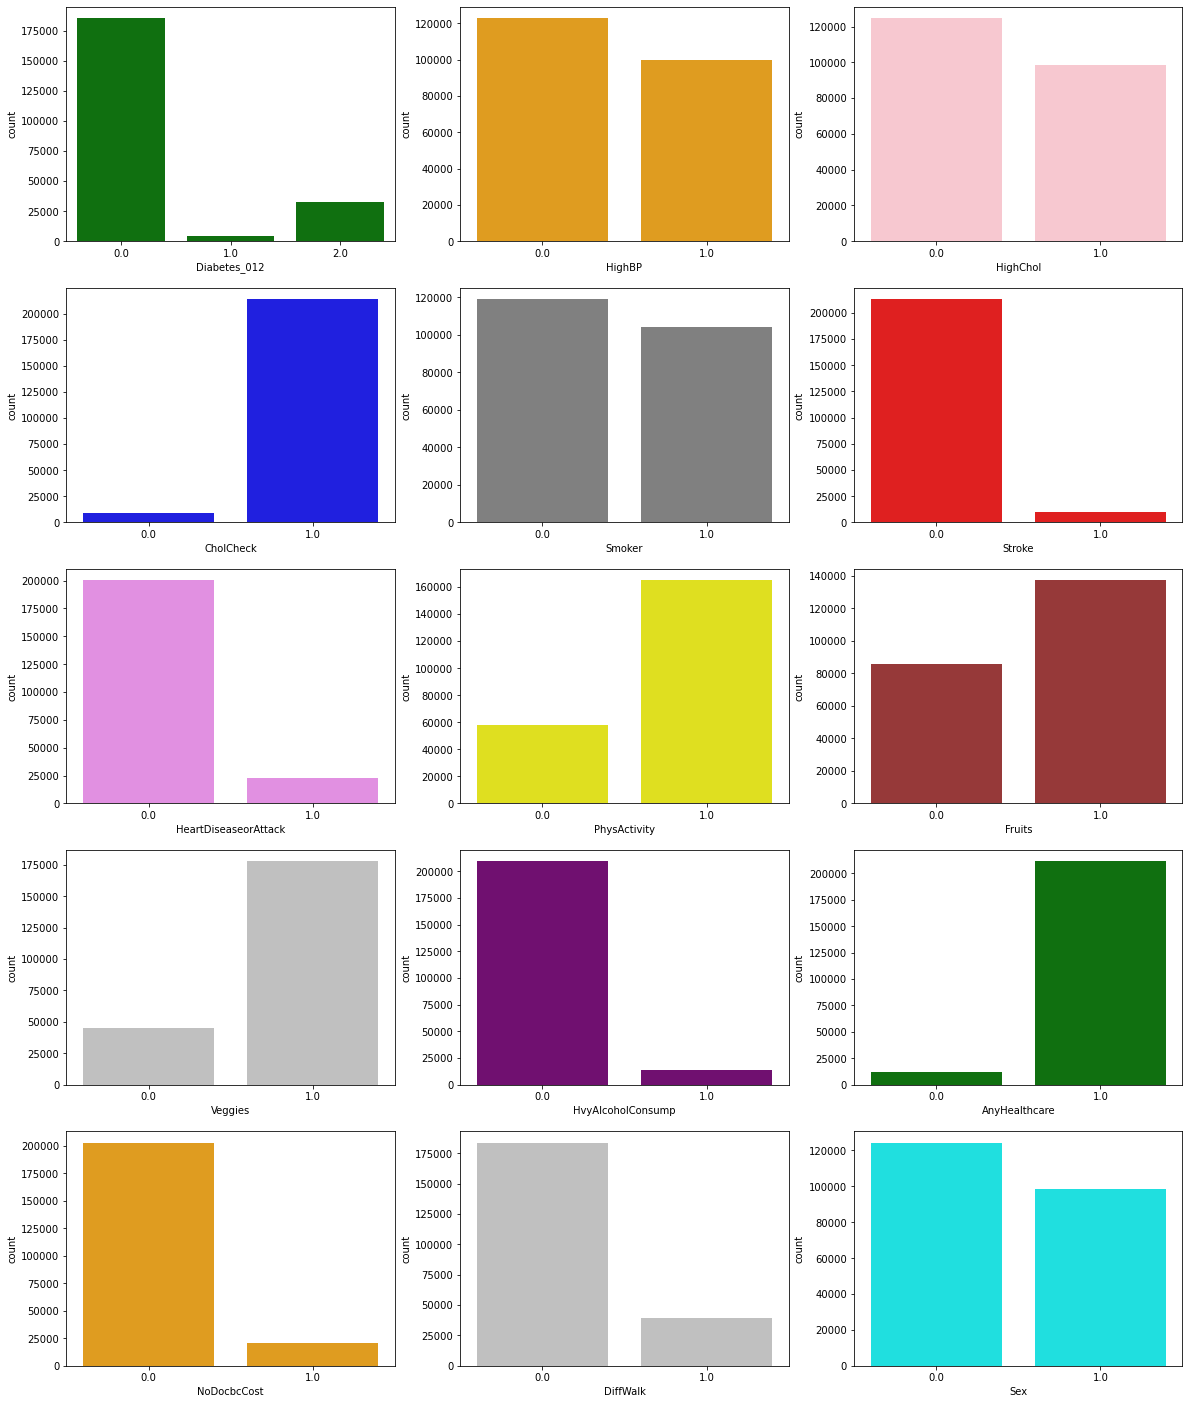

In [125]:
fig, axes = plt.subplots(5,3 , figsize=(20, 25))
sns.countplot(x='Diabetes_012', data=Diabetes,color="green",ax=axes[0,0])
sns.countplot(x='HighBP', data=Diabetes,color="orange",ax=axes[0,1])
sns.countplot(x='HighChol', data=Diabetes,color="pink",ax=axes[0,2])
sns.countplot(x='CholCheck', data=Diabetes,color="blue",ax=axes[1,0])
sns.countplot(x='Smoker', data=Diabetes,color="gray",ax=axes[1,1])
sns.countplot(x='Stroke', data=Diabetes,color="red",ax=axes[1,2])
sns.countplot(x='HeartDiseaseorAttack', data=Diabetes,color="violet",ax=axes[2,0])
sns.countplot(x='PhysActivity', data=Diabetes,color="yellow",ax=axes[2,1])
sns.countplot(x='Fruits', data=Diabetes,color="brown",ax=axes[2,2])
sns.countplot(x='Veggies', data=Diabetes,color="silver",ax=axes[3,0])
sns.countplot(x='HvyAlcoholConsump', data=Diabetes,color="purple",ax=axes[3,1])
sns.countplot(x='AnyHealthcare', data=Diabetes,color="green",ax=axes[3,2])
sns.countplot(x='NoDocbcCost', data=Diabetes,color="orange",ax=axes[4,0])
sns.countplot(x='DiffWalk', data=Diabetes,color="silver",ax=axes[4,1])
sns.countplot(x='Sex', data=Diabetes,color="cyan",ax=axes[4,2])

<function matplotlib.pyplot.show(close=None, block=None)>

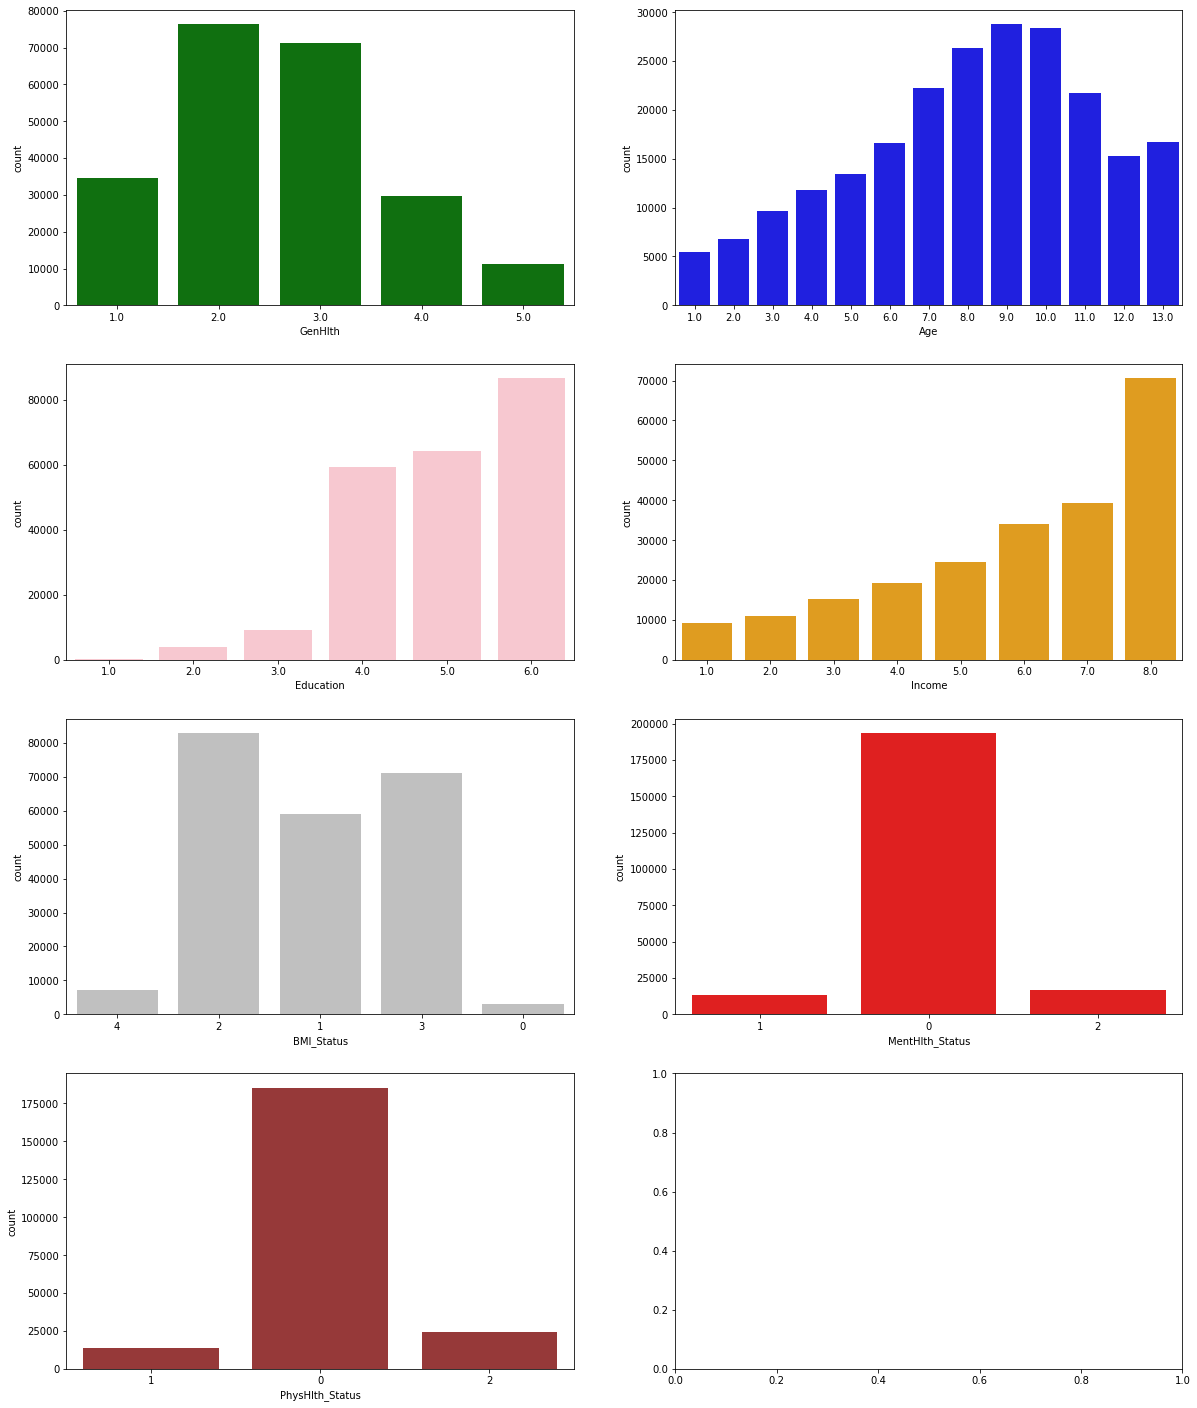

In [126]:
fig, axes = plt.subplots(4,2 , figsize=(20, 25))
sns.countplot(x='GenHlth', data=Diabetes,color="green",ax=axes[0,0])
sns.countplot(x='Age', data=Diabetes,color="blue",ax=axes[0,1])
sns.countplot(x='Education', data=Diabetes,color="pink",ax=axes[1,0])
sns.countplot(x='Income', data=Diabetes,color="orange",ax=axes[1,1])
sns.countplot(x='BMI_Status', data=Diabetes,color="silver",ax=axes[2,0])
sns.countplot(x='MentHlth_Status', data=Diabetes,color="red",ax=axes[2,1])
sns.countplot(x='PhysHlth_Status', data=Diabetes,color="brown",ax=axes[3,0])
plt.show

In [127]:
Diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_Status',
       'MentHlth_Status', 'PhysHlth_Status'],
      dtype='object')

<AxesSubplot:>

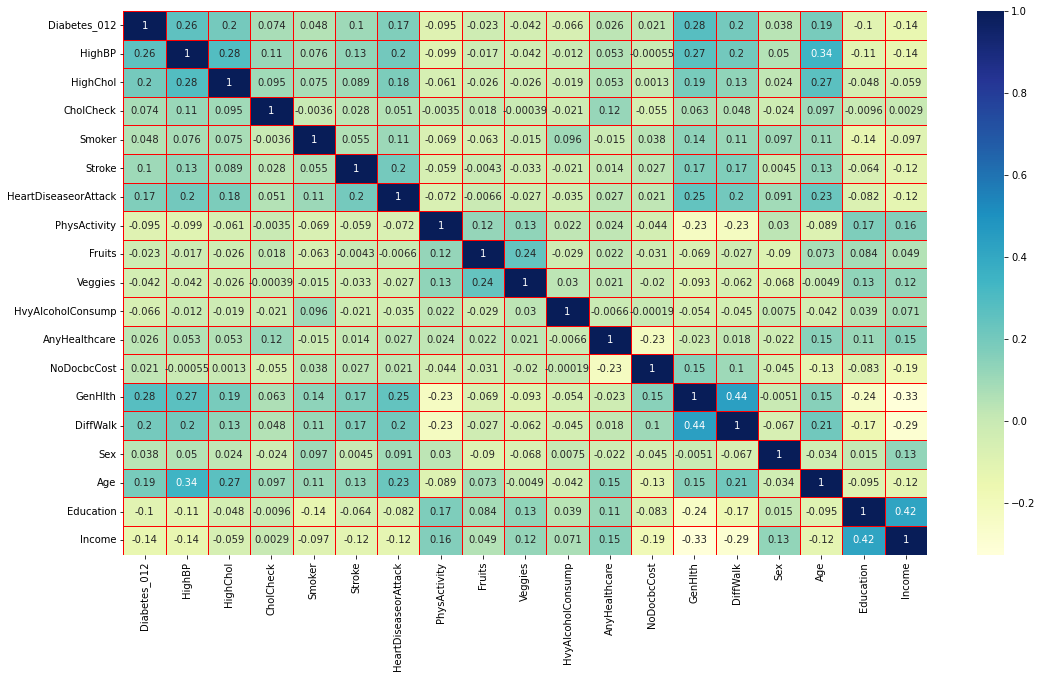

In [128]:
plt.figure(figsize=(18,10))
sns.heatmap(Diabetes.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

correlation heatmap show relation between columns
* No multicollinearity as non of the independent variables are correlated(highly).
* GenHlth and PhysHlth are highly correleted with each other.(positive relation)
* GenHlth and Income are highly correleted with each other .(negetive relation)
* Age and HighBP are highly correlated with each other.(positive relation)
* Age and HighChol having good correlation with each other.(positive relation)
* HighBP and HighChol having good correlation with each other.(positive relation)
* Education and Income are highly correleted with each other.(positive relation)
* GenHlth having moderate correlation with Diabetes_012, HighBP and Heat disease.(positive relation)

In [129]:
pd.crosstab(Diabetes.HighBP,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
HighBP,,,
0.0,113070,1658,8300
1.0,72847,2764,24455


* A person become vulnerable to diabetes if having higher blood pressure.

In [130]:
pd.crosstab(Diabetes.HighChol,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
HighChol,,,
0.0,112309,1663,10856
1.0,73608,2759,21899


*  A person become vulnerable to diabetes if having higher cholesterol.

In [131]:
pd.crosstab(Diabetes.CholCheck,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
CholCheck,,,
0.0,8846,59,230
1.0,177071,4363,32525


In [132]:
pd.crosstab(Diabetes.Smoker,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Smoker,,,
0.0,101117,2247,15630
1.0,84800,2175,17125


* No such relation between Smoker and Diabetes.

In [133]:
pd.crosstab(Diabetes.Stroke,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Stroke,,,
0.0,179311,4165,29678
1.0,6606,257,3077


In [134]:
pd.crosstab(Diabetes.HeartDiseaseorAttack,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
HeartDiseaseorAttack,,,
0.0,171044,3782,25368
1.0,14873,640,7387


In [135]:
pd.crosstab(Diabetes.PhysActivity,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
PhysActivity,,,
0.0,45050,1380,11765
1.0,140867,3042,20990


* Physical activity reduces the risk of diabetes.

In [136]:
pd.crosstab(Diabetes.Fruits,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Fruits,,,
0.0,70612,1740,13469
1.0,115305,2682,19286


* Eating at least one fruit a day reduces the risk of diabetes.

In [137]:
pd.crosstab(Diabetes.Veggies,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Veggies,,,
0.0,36491,999,7981
1.0,149426,3423,24774


* Eating at least one veggies a day slower the risk of diabetes.

In [138]:
pd.crosstab(Diabetes.HvyAlcoholConsump,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
HvyAlcoholConsump,,,
0.0,173154,4222,31960
1.0,12763,200,795


In [139]:
pd.crosstab(Diabetes.AnyHealthcare,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
AnyHealthcare,,,
0.0,10397,237,1289
1.0,175520,4185,31466


* Person are more likely having a healthcare if having diabetes.

In [140]:
pd.crosstab(Diabetes.NoDocbcCost,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
NoDocbcCost,,,
0.0,169567,3859,29383
1.0,16350,563,3372


In [141]:
pd.crosstab(Diabetes.GenHlth,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
GenHlth,,,
1.0,33226,309,1109
2.0,69112,1183,6122
3.0,56998,1654,12579
4.0,19780,953,8900
5.0,6801,323,4045


In [142]:
pd.crosstab(Diabetes.DiffWalk,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
DiffWalk,,,
0.0,159222,3246,21193
1.0,26695,1176,11562


In [143]:
pd.crosstab(Diabetes.Sex,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Sex,,,
0.0,105114,2465,16746
1.0,80803,1957,16009


* Male and female are equally vulnerable for Diabetes.

In [144]:
pd.crosstab(Diabetes.Age,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Age,,,
1.0,5319,21,71
2.0,6668,48,116
3.0,9288,58,266
4.0,11101,133,550
5.0,12400,152,905
6.0,14772,276,1528
7.0,19109,393,2753
8.0,21971,516,3846
9.0,22874,670,5241


* People older than 45 are more vulnerable for diabetes then the younger ones. when the age increase the number of diabetic people also increases.

In [145]:
pd.crosstab(Diabetes.Education,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Education,,,
1.0,121,1,44
2.0,2622,156,1109
3.0,6646,295,2103
4.0,47627,1292,10244
5.0,53496,1263,9571
6.0,75405,1415,9684


* When Education is going Higher the number of Diabetic people is dicreasing.

In [146]:
pd.crosstab(Diabetes.Income,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Income,,,
1.0,6798,302,2131
2.0,7959,330,2798
3.0,11592,400,3238
4.0,15028,434,3748
5.0,19797,555,4207
6.0,28380,717,4958
7.0,33565,708,4922
8.0,62798,976,6753


* People with lower income has more risk of diabetes then the Higher ones.

In [147]:
pd.crosstab(Diabetes.BMI_Status,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
BMI_Status,,,
0,2850,28,169
1,54328,689,3910
2,70770,1524,10565
3,53417,1963,15846
4,4552,218,2265


In [148]:
pd.crosstab(Diabetes.MentHlth_Status,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
MentHlth_Status,,,
0,162657,3660,27174
1,10630,300,2160
2,12630,462,3421


In [149]:
pd.crosstab(Diabetes.PhysHlth_Status,Diabetes.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
PhysHlth_Status,,,
0,159053,3364,23106
1,10087,389,2998
2,16777,669,6651


# 6. Building ML Model then performing their Visualization and Testing

In [150]:
X=Diabetes.drop(['Diabetes_012'],axis=1)
X.head()


,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMI_Status,MentHlth_Status,PhysHlth_Status
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,7.0,6.0,1.0,2,0,0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,1.0,0.0,9.0,4.0,8.0,2,2,2
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,11.0,3.0,6.0,2,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1,0,0


In [151]:
Y=Diabetes.Diabetes_012
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

# Checking for Multicollinearity

In [152]:
Int=X.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X.shape[1])]
VIF

,feature,VIF
0,HighBP,2.340090
1,HighChol,2.066631
2,CholCheck,20.597116
3,Smoker,1.989302
4,Stroke,1.127876
5,HeartDiseaseorAttack,1.294381
6,PhysActivity,4.215451
7,Fruits,2.844484
8,Veggies,5.308744
9,HvyAlcoholConsump,1.092804


* The variance inflation factor (VIF)
  So how do we detect and deal with collinearity? One way is to calculate the variance inflation factor for each feature. 
  It is generally deemed that a feature that has a VIF value greater than 5 is highly collinear with other features in the data.
  Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your model

In [153]:
V=X.drop(['Income','Education','Age','AnyHealthcare','Veggies','CholCheck'],axis=1)
V.head()

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,HvyAlcoholConsump,NoDocbcCost,GenHlth,DiffWalk,Sex,BMI_Status,MentHlth_Status,PhysHlth_Status
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,4,1,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2,0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,0.0,2,2,2
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2,0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1,0,0


In [154]:
V.shape

(223094, 15)

* We are using HOLDOUT Method for sampling method that is, we are dividing the whole data set into training and testing parts with        
(test size = 0.2). Then we train the model on training dataset and after that we execute how is the fit of the model on the basis of testing dataset.

*  Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
   Confusion Matrix-It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.
  

* True Positive:
  Interpretation: You predicted positive and it’s true.

* True Negative:
  Interpretation: You predicted negative and it’s true.

* False Positive: (Type 1 Error)
  Interpretation: You predicted positive and it’s false.

* False Negative: (Type 2 Error)
  Interpretation: You predicted negative and it’s false.

  Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.

* Let’s understand the confusion matrix elements

* Recall
  The above equation can be explained by saying, from all the positive classes, how many we predicted correctly.
  Recall should be high as possible.

* Precision
  The above equation can be explained by saying, from all the classes we have predicted as positive, how many are actually positive.
  Precision should be high as possible.

* Accuracy
  From all the classes (positive and negative), how many of them we have predicted correctly. 
  Accuracy should be high as possible.

* F1 Score 
  It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

#                                       6.1 LOGISTIC REGRESSION

In [155]:
Lr=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(V,Y, test_size=0.2, random_state=0)
Lr.fit(x_train, y_train)
Lr_train_accuracy=Lr.score(x_train,y_train)
Lr_test_accuracy=Lr.score(x_test,y_test)
y_Pred_Logistic=Lr.decision_function(x_test)

Text(0.5, 15.0, 'Predicted label')

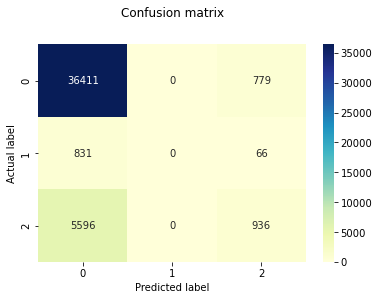

In [156]:
# CONFUSION MATRIX
y_Lr_Predicted = Lr.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_Lr_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [157]:
Prob_logistic=Lr.predict_proba(x_test)
roc_auc_score_Logistic=roc_auc_score(y_test,Prob_logistic,multi_class='ovo',average='weighted')
roc_auc_score_Logistic

0.7345698129668969

#           6.1.2  Dimension Reduction method (Principal Component Analysis) on Logistic Regression

In [158]:
pca=PCA(0.95)
# 0.95 representing that our model will retain 95% of useful features
X_pca=pca.fit_transform(V)
X_pca.shape


(223094, 12)

In [159]:
pca=PCA(0.90)
# 0.90 representing that our model will retain 90% of useful features
X_pca=pca.fit_transform(V)
X_pca.shape


(223094, 10)

* From above transformation we can see that 95 percentage of variation in data is itself represented by 12 variable aur 90 percentage of variation by 10 variables.

In [160]:
x_train, x_test, y_train, y_test=train_test_split(X_pca,Y,test_size=0.2,random_state=0)
Lr_pca=LogisticRegression()
Lr_pca.fit(x_train, y_train)
Lr_pca_train_accuracy=Lr_pca.score(x_train,y_train)
Lr_pca_test_accuracy=Lr_pca.score(x_test,y_test)
y_Pred_Logistic_PCA=Lr_pca.decision_function(x_test)

Text(0.5, 15.0, 'Predicted label')

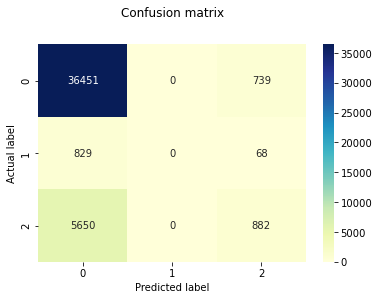

In [161]:
# CONFUSION MATRIX
y_Lr_pca_Predicted = Lr_pca.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_Lr_pca_Predicted )
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
Prob_logistic_pca=Lr_pca.predict_proba(x_test)
roc_auc_score_Logistic_pca=roc_auc_score(y_test,Prob_logistic_pca,multi_class='ovo',average='weighted')
roc_auc_score_Logistic_pca

0.7314166006730686

# 6.2 DECISION TREE CLASSIFIER

In [163]:
dt=DecisionTreeClassifier()
x_train, x_test, y_train, y_test=train_test_split(V, Y, test_size=0.20, random_state=0 )
dt.fit(x_train, y_train)
dt_train_accuracy=dt.score(x_train,y_train)
dt_test_accuracy=dt.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

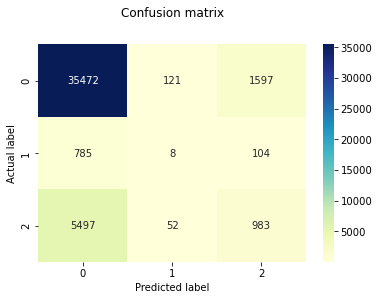

In [164]:
# CONFUSION MATRIX
y_dt_Predicted = dt.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_dt_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [165]:
Prob_Decision=dt.predict_proba(x_test)
roc_auc_score_Decision=roc_auc_score(y_test,Prob_Decision,multi_class='ovo',average='weighted')
roc_auc_score_Decision

0.6204343099412213

# 6.3 Ensemble Methods

# 6.3.1 Ensemble_Bagging Method on Decision Tree Classifier

In [166]:
x_train, x_test, y_train, y_test=train_test_split(V, Y, test_size=0.2, random_state=0 )
bag_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  n_estimators=50,
                  max_samples=0.80,
                  oob_score=True,
                  random_state=0)
bag_model.fit(x_train,y_train)
bag_model_train_accuracy=bag_model.score(x_train,y_train)
bag_model_test_accuracy=bag_model.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

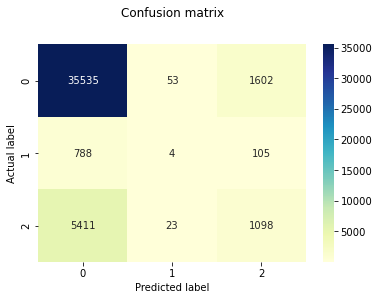

In [167]:
# CONFUSION MATRIX
y_bag_Predicted = bag_model.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_bag_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [169]:
Prob_Bag_Decision=bag_model.predict_proba(x_test)
roc_auc_score_Bag_Decision=roc_auc_score(y_test,Prob_Bag_Decision,multi_class='ovo',average='weighted')
roc_auc_score_Bag_Decision

0.6682500551477824

# 6.3.2 Ensemble_Boosting Method based on Decision Tree Classifier

In [170]:
x_train, x_test, y_train, y_test=train_test_split(V, Y, test_size=0.2, random_state=0 )
ADB_model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                  n_estimators=50,
                  random_state=0)
ADB_model.fit(x_train,y_train)
ADB_model_Train_accuracy=ADB_model.score(x_train,y_train)
ADB_model_Test_accuracy=ADB_model.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

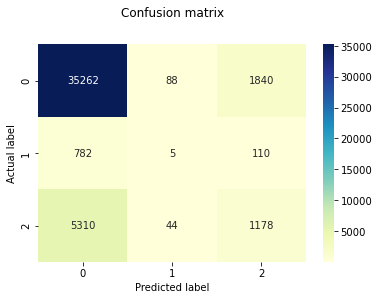

In [171]:
# CONFUSION MATRIX
y_ADB_Predicted = ADB_model.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_ADB_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [172]:
Prob_Boost_Decision=ADB_model.predict_proba(x_test)
roc_auc_score_Boost_Decision=roc_auc_score(y_test,Prob_Boost_Decision,multi_class='ovo',average='weighted')
roc_auc_score_Boost_Decision

0.5630453452998668

# 6.3.3 RANDOM FOREST CLASSIFIER

In [173]:
x_train, x_test, y_train, y_test = train_test_split(V,Y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_train_accuracy=rf.score(x_train,y_train)
rf_test_accuracy=rf.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

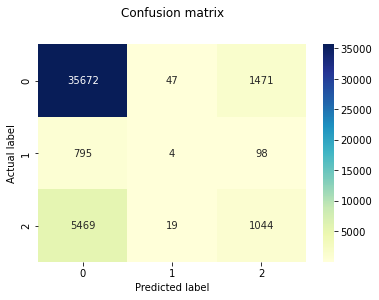

In [174]:
# CONFUSION MATRIX
y_rf_Predicted = rf.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_rf_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [176]:
Prob_RandomForest=rf.predict_proba(x_test)
roc_auc_score_RandomForest=roc_auc_score(y_test,Prob_RandomForest,multi_class='ovo',average='weighted')
roc_auc_score_RandomForest

0.6697502871342148

# 6.3.3.1 Randon forest on important features ( based on feature selection) 

In [177]:
importance=rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %5f' % (i,v))

Feature: 0, Score: 0.108012
Feature: 1, Score: 0.063488
Feature: 2, Score: 0.050398
Feature: 3, Score: 0.028431
Feature: 4, Score: 0.042406
Feature: 5, Score: 0.044299
Feature: 6, Score: 0.055985
Feature: 7, Score: 0.018824
Feature: 8, Score: 0.039954
Feature: 9, Score: 0.173137
Feature: 10, Score: 0.050937
Feature: 11, Score: 0.045821
Feature: 12, Score: 0.127881
Feature: 13, Score: 0.074108
Feature: 14, Score: 0.076319


# Visualization of importanat features

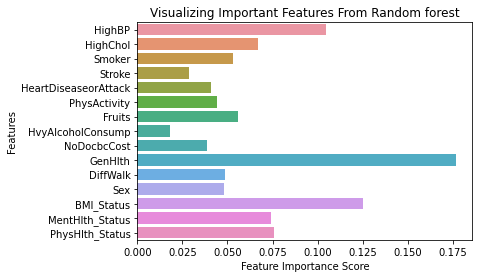

In [178]:
rf_fea_imp=RandomForestClassifier()
rf_fea_imp.fit(x_train,y_train)
feature_imp1 = rf_fea_imp.feature_importances_
sns.barplot(x=feature_imp1, y=V.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest")
plt.show();

* As we dont know which features has to be selected for the model, we are just using the features with Feature importance score more than 0.05.

In [179]:
V.columns

Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'BMI_Status', 'MentHlth_Status', 'PhysHlth_Status'],
      dtype='object')

In [180]:
z=V.drop([ 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'NoDocbcCost',
       'DiffWalk', 'Sex'],axis=1)
z.columns

Index(['HighBP', 'HighChol', 'Smoker', 'Fruits', 'GenHlth', 'BMI_Status',
       'MentHlth_Status', 'PhysHlth_Status'],
      dtype='object')

In [181]:
x_train, x_test, y_train, y_test = train_test_split(z,Y, test_size=0.2, random_state=0)
rf_imp = RandomForestClassifier()
rf_imp.fit(x_train,y_train)
rf_imp_train_accuracy=rf_imp.score(x_train,y_train)
rf_imp_test_accuracy=rf_imp.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

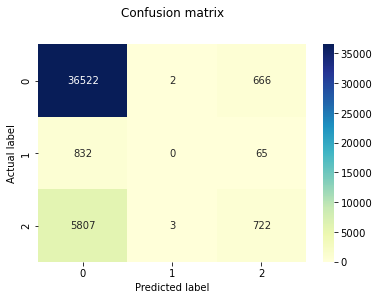

In [182]:
# CONFUSION MATRIX
y_rf_imp_Predicted = rf_imp.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_rf_imp_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [184]:
Prob_RandomForest_imp=rf_imp.predict_proba(x_test)
roc_auc_score_RandomForest_imp=roc_auc_score(y_test,Prob_RandomForest_imp,multi_class='ovo',average='weighted')
roc_auc_score_RandomForest_imp

0.7065770915483048

# 6.3.3.2 Random Forest on important features (based on forward feature selection)

In [185]:
x_train, x_test, y_train, y_test=train_test_split(V, Y, test_size=0.20, random_state=0 )
forward_feature_selection=SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                   k_features=(1,15),
                                                   forward=True,
                                                   floating=False,
                                                   verbose=2,
                                                   scoring="accuracy",
                                                   cv=3).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   50.3s finished

[2022-10-11 16:09:37] Features: 1/15 -- score: 0.8333211934339945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   50.7s finished

[2022-10-11 16:10:28] Features: 2/15 -- score: 0.8333211934339945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   51.0s finished

[2022-10-11 16:11:19] Features: 3/15 -- score: 0.8337974489804093[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [186]:
forward_feature_selection.k_feature_idx_,forward_feature_selection.k_feature_names_

((0, 1, 7, 9, 12),
 ('HighBP', 'HighChol', 'HvyAlcoholConsump', 'GenHlth', 'BMI_Status'))

In [187]:
forward_feature_selection.k_score_

0.8372993424191243

In [188]:
FFS=V.iloc[:,[0, 1, 7, 9, 12]]
FFS.shape

(223094, 5)

In [189]:
FFS.head()

,HighBP,HighChol,HvyAlcoholConsump,GenHlth,BMI_Status
0,1.0,1.0,0.0,5.0,4
1,0.0,0.0,0.0,3.0,2
2,1.0,1.0,0.0,5.0,2
3,1.0,0.0,0.0,2.0,2
4,1.0,1.0,0.0,2.0,1


In [190]:
Pred=Y
Targ=FFS

In [191]:
Pred.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

In [192]:
Targ.head()

,HighBP,HighChol,HvyAlcoholConsump,GenHlth,BMI_Status
0,1.0,1.0,0.0,5.0,4
1,0.0,0.0,0.0,3.0,2
2,1.0,1.0,0.0,5.0,2
3,1.0,0.0,0.0,2.0,2
4,1.0,1.0,0.0,2.0,1


In [193]:
rf_imp_FFS=RandomForestClassifier()
x_train, x_test, y_train, y_test=train_test_split(Targ, Pred, test_size=0.20, random_state=0 )
rf_imp_FFS.fit(x_train, y_train)
rf_imp_FFS_train_accuracy=rf_imp_FFS.score(x_train,y_train)
rf_imp_FFS_test_accuracy=rf_imp_FFS.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

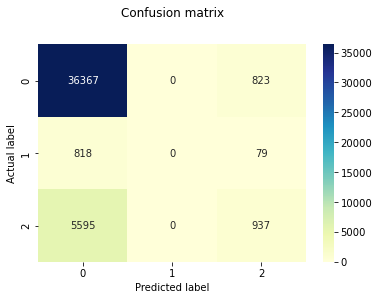

In [194]:
# CONFUSION MATRIX
y_rf_imp_FFS_Predicted = rf_imp_FFS.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_rf_imp_FFS_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[Text(0.5448203363914373, 0.9545454545454546, 'BMI_Status <= 2.5\ngini = 0.283\nsamples = 112637\nvalue = [148825, 3525, 26125]'),
 Text(0.2937691131498471, 0.8636363636363636, 'HighBP <= 0.5\ngini = 0.209\nsamples = 73007\nvalue = [102293, 1815, 11692]'),
 Text(0.14745795107033638, 0.7727272727272727, 'HighChol <= 0.5\ngini = 0.113\nsamples = 44746\nvalue = [66768, 805, 3426]'),
 Text(0.07415902140672782, 0.6818181818181818, 'GenHlth <= 2.5\ngini = 0.077\nsamples = 31316\nvalue = [47680, 410, 1578]'),
 Text(0.04128440366972477, 0.5909090909090909, 'BMI_Status <= 1.5\ngini = 0.044\nsamples = 21080\nvalue = [32817, 202, 553]'),
 Text(0.024464831804281346, 0.5, 'GenHlth <= 1.5\ngini = 0.034\nsamples = 11063\nvalue = [17309, 95, 212]'),
 Text(0.012232415902140673, 0.4090909090909091, 'HvyAlcoholConsump <= 0.5\ngini = 0.023\nsamples = 4871\nvalue = [7655, 31, 58]'),
 Text(0.0061162079510703364, 0.3181818181818182, 'BMI_Status <= 0.5\ngini = 0.025\nsamples = 4420\nvalue = [6923, 30, 57]'),


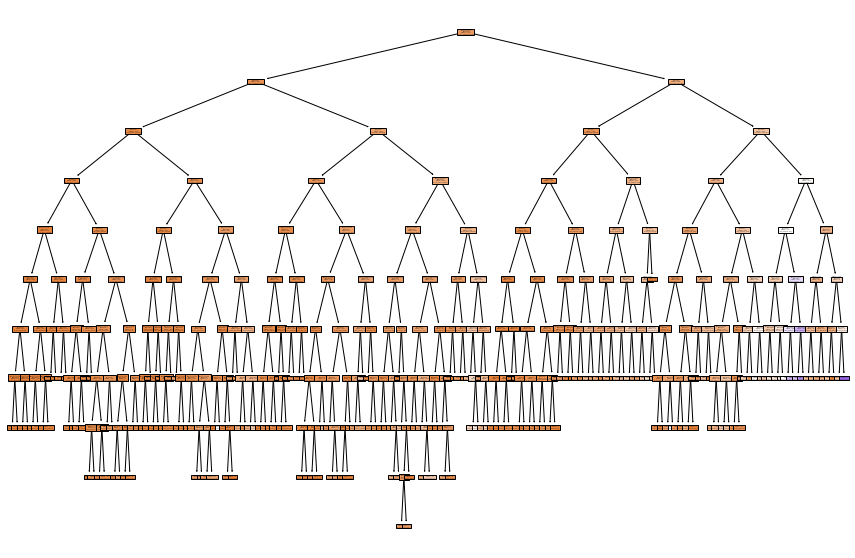

In [195]:
plt.figure(figsize=(15,10))
tree.plot_tree(rf_imp_FFS.estimators_[1],feature_names=(['HighBP', 'HighChol', 'HvyAlcoholConsump', 'GenHlth',
                                                         'BMI_Status']),filled=True)

In [196]:
Prob_RandomForest_FFS=rf_imp_FFS.predict_proba(x_test)
roc_auc_score_RandomForest_FFS=roc_auc_score(y_test,Prob_RandomForest_FFS,multi_class='ovo',average='weighted')
roc_auc_score_RandomForest_FFS

0.7266004452466928

# 7. Hyperparameter Tuning with Random Forest Classifier (based on forward selection)

#  RandomizedSearchCV 

In [197]:
n_estimators = [100, 200, 300, 400, 500,550,600,700]
max_features = ['auto']
max_depth = [5,6,9, 10,12,15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf_imp_FFS, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [198]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  39.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  40.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  40.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  40.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  39.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  33.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  33.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 9, 10, 12, 15, 20,
                                                      25, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 550, 600, 700]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [199]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 25}

In [200]:
RFR_Tune_RSCV = RandomForestClassifier(n_estimators=600,
                            min_samples_split= 100,
                            min_samples_leaf=5,
                            max_features='auto',
                            max_depth=25)
x_train, x_test, y_train, y_test=train_test_split(Targ, Pred, test_size=0.20, random_state=0 )
RFR_Tune_RSCV.fit(x_train,y_train)
RFR_Tune_RSCV_train_accuracy=RFR_Tune_RSCV.score(x_train,y_train)
RFR_Tune_RSCV_test_accuracy=RFR_Tune_RSCV.score(x_test,y_test)

Text(0.5, 15.0, 'Predicted label')

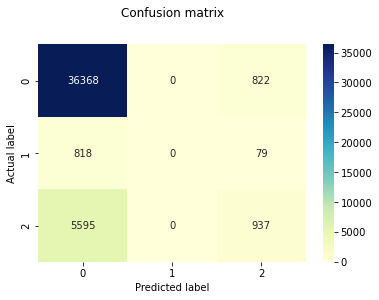

In [201]:
# CONFUSION MATRIX
y_RFR_Tune_RSCV_Predicted = RFR_Tune_RSCV.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_RFR_Tune_RSCV_Predicted)
CM_Lr = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
Prob_RFR_Tune_RSCV=RFR_Tune_RSCV.predict_proba(x_test)
roc_auc_score_RFR_Tune_RSCV=roc_auc_score(y_test,Prob_RFR_Tune_RSCV,multi_class='ovo',average='weighted')
roc_auc_score_RFR_Tune_RSCV

0.7272806069633657

# 8. Accuracy of Train-Test of Models

In [203]:
Accuracy=pd.DataFrame([["Logistic_Regression",Lr_train_accuracy, Lr_test_accuracy],
                       ["Logistic_Regression_PCA",Lr_pca_train_accuracy , Lr_pca_test_accuracy],
                       ["Decision_Tree",dt_train_accuracy,dt_test_accuracy],
                       ["Bagging on Decision_Tree",bag_model_train_accuracy,bag_model_test_accuracy],
                       ["Boosting on Decision_Tree",ADB_model_Train_accuracy,ADB_model_Test_accuracy],
                       ["Random_Forest_Classifier",rf_train_accuracy,rf_test_accuracy],
                       ["Random_Forest_Fea_imp",rf_imp_train_accuracy,rf_imp_test_accuracy],
                       ["Random_Forest_imp_FFS",rf_imp_FFS_train_accuracy,rf_imp_FFS_test_accuracy],
                       ["Random_Forest_imp_FFS_RSCV",RFR_Tune_RSCV_train_accuracy,RFR_Tune_RSCV_test_accuracy]],
                      columns=["Model","Train Accuracy","Test Accuracy"])
Accuracy

,Model,Train Accuracy,Test Accuracy
0,Logistic_Regression,0.837019,0.837020
1,Logistic_Regression_PCA,0.836526,0.836706
2,Decision_Tree,0.871321,0.817208
3,Bagging on Decision_Tree,0.870626,0.821108
4,Boosting on Decision_Tree,0.871293,0.816805
5,Random_Forest_Classifier,0.871315,0.822968
6,Random_Forest_Fea_imp,0.839300,0.834712
7,Random_Forest_imp_FFS,0.837339,0.836056
8,Random_Forest_imp_FFS_RSCV,0.837322,0.836079


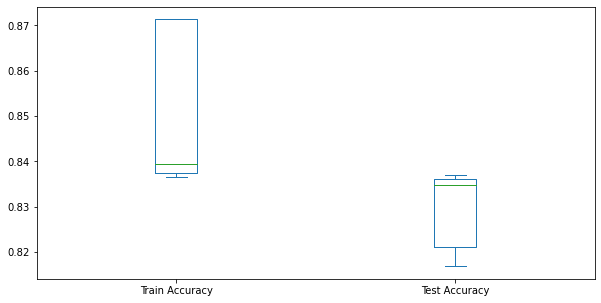

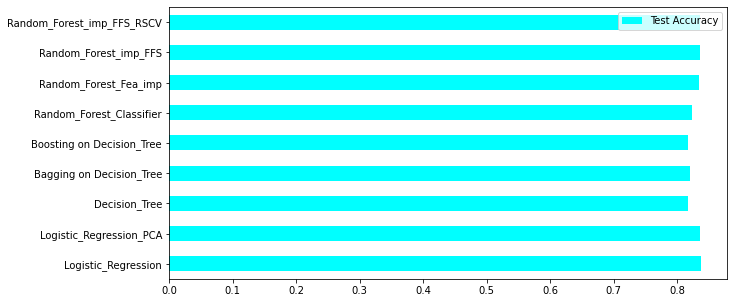

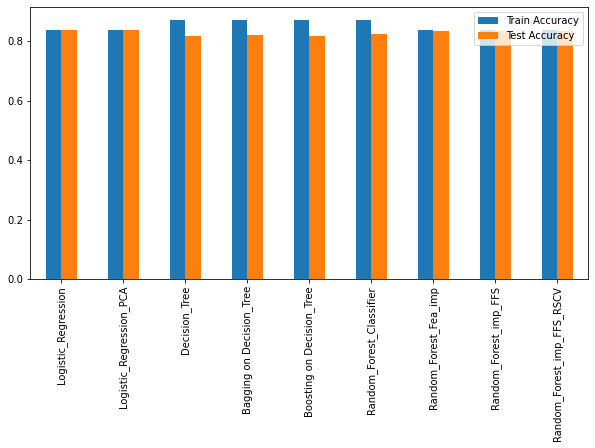

In [204]:
Train_Accuracy=[Lr_train_accuracy,Lr_pca_train_accuracy,dt_train_accuracy,bag_model_train_accuracy,
                ADB_model_Train_accuracy,rf_train_accuracy,rf_imp_train_accuracy,rf_imp_FFS_train_accuracy,
                RFR_Tune_RSCV_train_accuracy]
Test_Accuracy=[Lr_test_accuracy,Lr_pca_test_accuracy,dt_test_accuracy,bag_model_test_accuracy,ADB_model_Test_accuracy,
               rf_test_accuracy,rf_imp_test_accuracy,rf_imp_FFS_test_accuracy,
                RFR_Tune_RSCV_test_accuracy]
index=["Logistic_Regression","Logistic_Regression_PCA","Decision_Tree","Bagging on Decision_Tree",
        "Boosting on Decision_Tree","Random_Forest_Classifier","Random_Forest_Fea_imp",
        "Random_Forest_imp_FFS","Random_Forest_imp_FFS_RSCV"]
df=pd.DataFrame({'Train Accuracy':Train_Accuracy,'Test Accuracy':Test_Accuracy},index=index)
df2=pd.DataFrame({'Test Accuracy':Test_Accuracy},index=index)
ax=df.plot.box(figsize=(10,5)),df2.plot.barh(figsize=(10,5),color='cyan'),df.plot.bar(figsize=(10,5))

# 9. Confusion Matrix of Models

In [205]:
print(classification_report(y_test, y_Lr_Predicted),"For Logistic Regression")
print(classification_report(y_test, y_Lr_pca_Predicted),"For Logistic Regression with Principel component analysis")
print(classification_report(y_test, y_dt_Predicted),"For Decision tree")
print(classification_report(y_test, y_bag_Predicted),"For Bagging on Decision tree")
print(classification_report(y_test, y_ADB_Predicted),"For Boosting on Decision tree")
print(classification_report(y_test, y_rf_Predicted),"For Random Forest Classifier")
print(classification_report(y_test, y_rf_imp_Predicted),"For Random Forest Classifier on important features (based on important feature selection) ")
print(classification_report(y_test, y_rf_imp_FFS_Predicted),"For Random Forest Classifier on important features (based on forward feature selection)")
print(classification_report(y_test, y_RFR_Tune_RSCV_Predicted),"For tuned hyper parameter of Random Forest Classifier on important feature (based on forward selection)")

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37190
         1.0       0.00      0.00      0.00       897
         2.0       0.53      0.14      0.23      6532

    accuracy                           0.84     44619
   macro avg       0.46      0.37      0.38     44619
weighted avg       0.79      0.84      0.79     44619
 For Logistic Regression
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37190
         1.0       0.00      0.00      0.00       897
         2.0       0.52      0.14      0.21      6532

    accuracy                           0.84     44619
   macro avg       0.46      0.37      0.37     44619
weighted avg       0.78      0.84      0.79     44619
 For Logistic Regression with Principel component analysis
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     37190
         1.0       0.04      0.01      0.01    

In [206]:
Conf_Mat=pd.DataFrame([["Logistic_Regression",0.79,0.84,0.79,0.84],
                       ["Logistic_Regression_PCA",0.78,0.83,0.79,0.83],
                       ["Decision_Tree",0.76,0.77,0.76,0.77],
                       ["Bagging on Decision_Tree",0.77,0.81,0.79,0.81],
                       ["Boosting on Decision_Tree",0.76,0.80,0.78,0.80],
                       ["Random_Forest_Classifier",0.77,0.82,0.79,0.82],
                       ["Random_Forest_Fea_imp",0.77,0.82,0.78,0.82],
                       ["Random_Forest_imp_FFS",0.78,0.84,0.79,0.84],
                       ["Random_Forest_imp_FFS_RSCV",0.78,0.84,0.79,0.84]],
                      columns=["Model","Weighted Precision","Weighted Recall","Weighted F1-score","Weighted Accuracy"])
Conf_Mat
                       

,Model,Weighted Precision,Weighted Recall,Weighted F1-score,Weighted Accuracy
0,Logistic_Regression,0.79,0.84,0.79,0.84
1,Logistic_Regression_PCA,0.78,0.83,0.79,0.83
2,Decision_Tree,0.76,0.77,0.76,0.77
3,Bagging on Decision_Tree,0.77,0.81,0.79,0.81
4,Boosting on Decision_Tree,0.76,0.80,0.78,0.80
5,Random_Forest_Classifier,0.77,0.82,0.79,0.82
6,Random_Forest_Fea_imp,0.77,0.82,0.78,0.82
7,Random_Forest_imp_FFS,0.78,0.84,0.79,0.84
8,Random_Forest_imp_FFS_RSCV,0.78,0.84,0.79,0.84


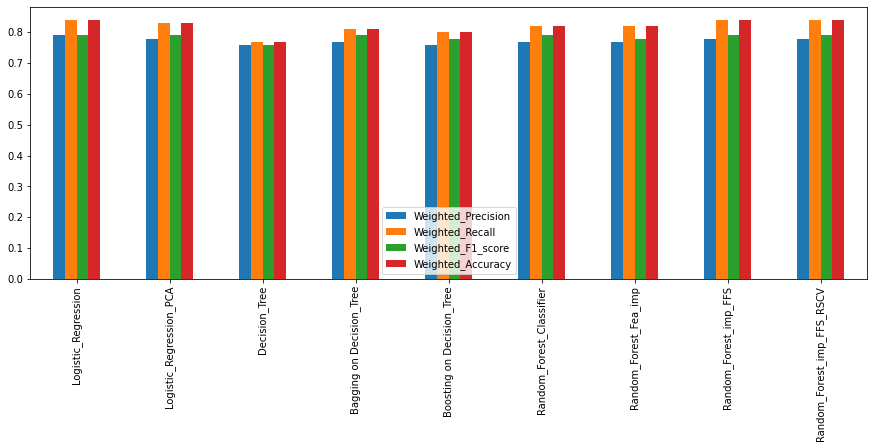

In [207]:
Weighted_Precision=[0.79,0.78,0.76,0.77,0.76,0.77,0.77,0.78,0.78]
Weighted_Recall=[0.84,0.83,0.77,0.81,0.8,0.82,0.82,0.84,0.84]
Weighted_F1_score=[0.79,0.79,0.76,0.79,0.78,0.79,0.78,0.79,0.79]
Weighted_Accuracy=[0.84,0.83,0.77,0.81,0.8,0.82,0.82,0.84,0.84]
index=["Logistic_Regression","Logistic_Regression_PCA","Decision_Tree","Bagging on Decision_Tree",
       "Boosting on Decision_Tree","Random_Forest_Classifier","Random_Forest_Fea_imp",
       "Random_Forest_imp_FFS","Random_Forest_imp_FFS_RSCV"]
df=pd.DataFrame({'Weighted_Precision':Weighted_Precision,'Weighted_Recall':Weighted_Recall,'Weighted_F1_score':Weighted_F1_score,'Weighted_Accuracy':Weighted_Accuracy},index=index)
ax=df.plot.bar(figsize=(15,5))

# 10.  Area under curve for Receiver operating characteristic curve(ROC curve) for Models

In [208]:
AUC=pd.DataFrame([["Logistic_Regression",roc_auc_score_Logistic],
                       ["Logistic_Regression_PCA",roc_auc_score_Logistic_pca],
                       ["Decision_Tree",roc_auc_score_Decision],
                       ["Bagging on Decision_Tree",roc_auc_score_Bag_Decision],
                       ["Boosting on Decision_Tree",roc_auc_score_Boost_Decision],
                       ["Random_Forest_Classifier",roc_auc_score_RandomForest],
                       ["Random_Forest_Fea_imp",roc_auc_score_RandomForest_imp],
                       ["Random_Forest_imp_FFS",roc_auc_score_RandomForest_FFS],
                       ["Random_Forest_imp_FFS_RSCV",roc_auc_score_RFR_Tune_RSCV]],
                      columns=["Model","AUC(ROC curve)"])
AUC

,Model,AUC(ROC curve)
0,Logistic_Regression,0.734570
1,Logistic_Regression_PCA,0.731417
2,Decision_Tree,0.620434
3,Bagging on Decision_Tree,0.668250
4,Boosting on Decision_Tree,0.563045
5,Random_Forest_Classifier,0.669750
6,Random_Forest_Fea_imp,0.706577
7,Random_Forest_imp_FFS,0.726600
8,Random_Forest_imp_FFS_RSCV,0.727281


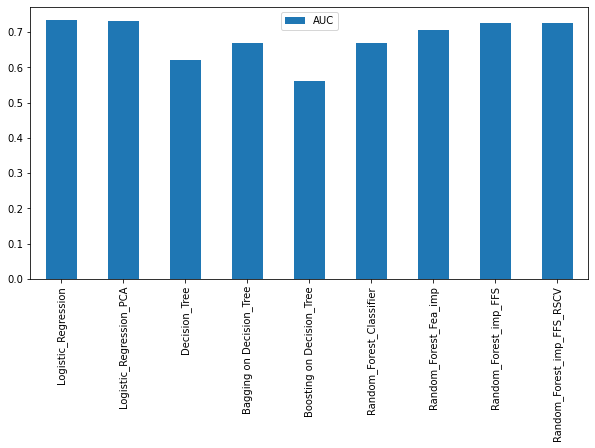

In [215]:
AUC_ROC=[roc_auc_score_Logistic,roc_auc_score_Logistic_pca,roc_auc_score_Decision,
         roc_auc_score_Bag_Decision,roc_auc_score_Boost_Decision,roc_auc_score_RandomForest,
         roc_auc_score_RandomForest_imp,roc_auc_score_RandomForest_FFS,roc_auc_score_RFR_Tune_RSCV]
index=["Logistic_Regression","Logistic_Regression_PCA","Decision_Tree","Bagging on Decision_Tree",
        "Boosting on Decision_Tree","Random_Forest_Classifier","Random_Forest_Fea_imp",
        "Random_Forest_imp_FFS","Random_Forest_imp_FFS_RSCV"]
df=pd.DataFrame({"AUC":AUC_ROC},index=index)
ax=df.plot.bar(figsize=(10,5))

# PREDICTIONS 

In [216]:
len(y_test)

44619

* Predicterd Premium Price on the basis of Random forest regressor with tunned parameters by RandomSearchCV method on the basis of features selected on the basis of forward selection technique

In [217]:
x_train, x_test, y_train, y_test=train_test_split(Targ, Pred, test_size=0.20, random_state=0 )
x_test.columns

Index(['HighBP', 'HighChol', 'HvyAlcoholConsump', 'GenHlth', 'BMI_Status'], dtype='object')

In [218]:
Y_Predicted=RFR_Tune_RSCV.predict(x_test)
Y_Predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [219]:
np.corrcoef(y_test,RFR_Tune_RSCV.predict(x_test))

array([[1.        , 0.21806282],
       [0.21806282, 1.        ]])

 * HighBP: 0 if not high BP and 1 if high BP
 * HighChol: 0 if not high cholesterol  and 1 if high cholesterol 
 * HvyAlcoholConsump: Heavy drinker(adult men having more than 14 drinks per week and adult women having more than 7 drink         per week), 0 if no and 1 if yes    
 * GenHlth: Health score: 1=excellent, 2=very good, 3=good, 4=fair, 5=poor                       
 * BMI_Status: under_index = 0, normal_index = 1 ,over_index = 2, obesity_index = 3, Extreme_obesity_index = 4


In [220]:
# Random Prediction...
RFR_Tune_RSCV.predict([[1,0,0,2,2],
                          [1,1,1,5,4],
                          [0,0,0,1,1]])

array([0., 0., 0.])

* The randomly entered status of any patient show that he has no diabetes. 

# CONCLUSION

* No multicollinearity as non of the independent variables are correlated(highly).
* GenHlth and PhysHlth are highly correleted with each other.(positive relation)
* GenHlth and Income are highly correleted with each other .(negetive relation)
* Age and HighBP are highly correlated with each other.(positive relation)
* Age and HighChol having good correlation with each other.(positive relation)
* HighBP and HighChol having good correlation with each other.(positive relation)
* Education and Income are highly correleted with each other.(positive relation)
* GenHlth having moderate correlation with Diabetes_012, HighBP and Heat disease.(positive relation)
* A person become vulnerable to diabetes if having higher blood pressure
* No such relation between Smoker and Diabetes
* Physical activity reduces the risk of diabetes.
* Eating at least one fruit a day reduces the risk of diabetes
* Eating at least one veggies a day slower the risk of diabetes
* Person are more likely having a healthcare if having diabetes
* Male and female are equally vulnerable for Diabetes
* People older than 45 are more vulnerable for diabetes then the younger ones. when the age increase the number of diabetic people also increases
* When Education is going Higher the number of Diabetic people is dicreasing.
* People with lower income has more risk of diabetes then the Higher ones.
* By Train-Test Accuracy and Confusion Matrix and Area under curve of ROC we can say that Random Forest with tunned Hyperparametrs perform best
